In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
iris = sns.load_dataset('iris')

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


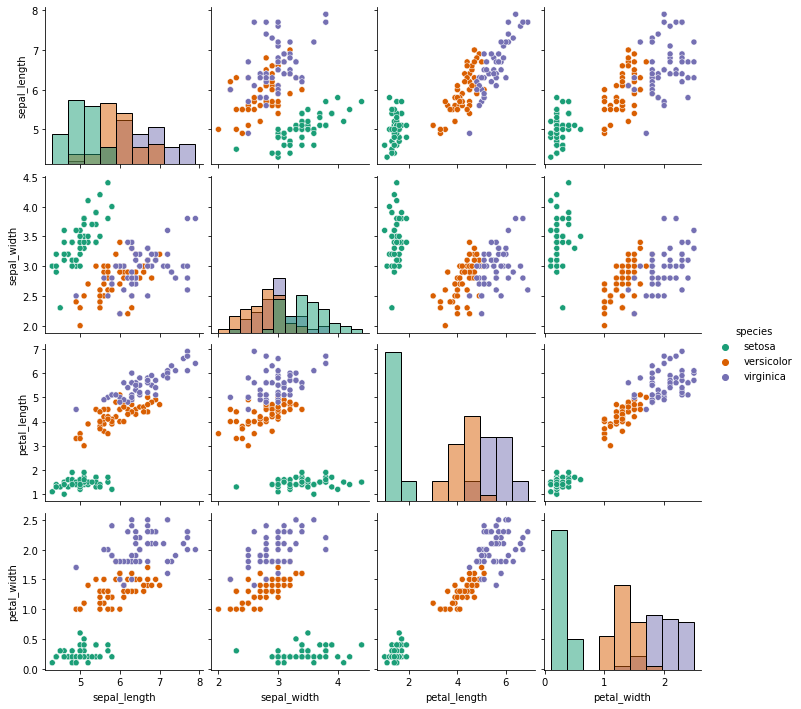

In [18]:
sns.pairplot(iris, hue='species', diag_kind='hist', palette='Dark2')

C:\Users\Sowmik\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

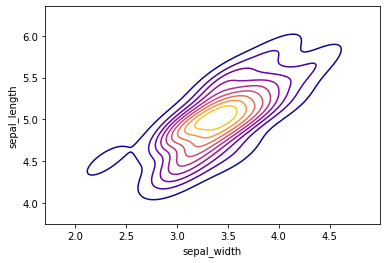

In [22]:
setosa = iris[iris['species']=='setosa']
sns.kdeplot( setosa['sepal_width'], setosa['sepal_length'], data= setosa,
                 cmap="plasma")

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = iris.drop('species', axis=1)
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.30)

In [25]:
from sklearn.svm import SVC

In [26]:
svc_model = SVC()

In [27]:
svc_model.fit(X_train,y_train)

SVC()

In [28]:
svc_model.score(X_train,y_train)

1.0

In [29]:
predictions = svc_model.predict(X_test)

In [30]:
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[34  0  0]
 [ 0 35  2]
 [ 0  4 30]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        34
  versicolor       0.90      0.95      0.92        37
   virginica       0.94      0.88      0.91        34

    accuracy                           0.94       105
   macro avg       0.94      0.94      0.94       105
weighted avg       0.94      0.94      0.94       105



## Gridsearch

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
param_grid = {'C': [0.1,1,10,100], 'gamma': [1,0.1,0.01,0.001]}

In [34]:
grid = GridSearchCV(svc_model, param_grid,refit=True,verbose=2)

In [35]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [36]:
grid.best_params_

{'C': 1, 'gamma': 1}

In [38]:
grid_predictions = grid.predict(X_test)

In [40]:
print(grid_predictions)

['setosa' 'versicolor' 'versicolor' 'virginica' 'versicolor' 'setosa'
 'virginica' 'versicolor' 'setosa' 'versicolor' 'virginica' 'virginica'
 'setosa' 'setosa' 'versicolor' 'setosa' 'versicolor' 'virginica'
 'versicolor' 'versicolor' 'virginica' 'virginica' 'setosa' 'versicolor'
 'virginica' 'setosa' 'versicolor' 'versicolor' 'setosa' 'versicolor'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'virginica' 'setosa' 'setosa'
 'versicolor' 'versicolor' 'versicolor' 'virginica' 'virginica'
 'virginica' 'setosa' 'virginica' 'setosa' 'virginica' 'setosa' 'setosa'
 'versicolor' 'setosa' 'setosa' 'virginica' 'virginica' 'virginica'
 'setosa' 'virginica' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'virginica' 'versicolor'
 'virginica' 'setosa' 'versicolor' 'versicolor' 'setosa' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'versicolor' 'virginica' 'setosa'
 'virginica' 'setosa' 'virginica' 'setosa' 'versicolor' 'setosa' 'setosa'
 'virginica' '

In [41]:
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[34  0  0]
 [ 0 35  2]
 [ 0  1 33]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        34
  versicolor       0.97      0.95      0.96        37
   virginica       0.94      0.97      0.96        34

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105

